In [11]:
from pathlib import Path
import torch
import numpy as np
import pandas as pd

In [28]:
model_names = {
    "45792df32ad68649ffd066ae40be4868": "VGG-16",
    "c1db9e608f0c23077ab39f272306cb35": "ResNet-20-64",
    "8146fc7e9839615729ee764a8019bdc5": "VGG-16",
    "0683974d98b4b6cb906aa0b80db9e2f5": "ResNet-20-64",
}

is_pruned = {
    "45792df32ad68649ffd066ae40be4868": True,
    "c1db9e608f0c23077ab39f272306cb35": True,
    "8146fc7e9839615729ee764a8019bdc5": False,
    "0683974d98b4b6cb906aa0b80db9e2f5": False,
}

df = pd.read_csv("../refactor-outputs/barriers.csv")
df["level"] = df["type"].apply(lambda x: x.split("-")[0])
df["level.int"] = df["level"].apply(lambda x: int(x.split("_")[1]))
df["epoch"] = df["type"].apply(lambda x: x.split("-")[1])
df["epoch.int"] = df["epoch"].apply(lambda x: int(x.split("ep")[1].split("_")[0]))
df["type.is_train"] = df["type"].apply(lambda x: x.split("-")[2] == "train")
df["algorithm"] = df["path"].apply(lambda x: x.split("/")[8])
df["algorithm.weight"] = df["algorithm"].apply(lambda x: x.split("_")[0] == "weight")
df["algorithm.kernel"] = df["algorithm"].apply(lambda x: x.split("_")[1])
df["path.hash"] = df["path"].apply(lambda x: x.split("/")[-3].split("lottery_")[1])
df["path.model_name"] = df["path.hash"].apply(lambda x: model_names[x])
df["path.is_pruned"] = df["path.hash"].apply(lambda x: is_pruned[x])
df["acc_barrier"] = df["acc_barrier"].apply(lambda x: -x)
df

,Unnamed: 0,path,type,interpolation,eval_loss,acc,loss_barrier,acc_barrier,interpolation.idx,eval_loss.idx,...,level.int,epoch,epoch.int,type.is_train,algorithm,algorithm.weight,algorithm.kernel,path.hash,path.model_name,path.is_pruned
0,0,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_0-ep160_it0-train,11,0.9999,0.000798,0.00000,-0.000000,11,10,...,0,ep160_it0,160,True,weight_linear,True,linear,45792df32ad68649ffd066ae40be4868,VGG-16,True
1,1,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_0-ep160_it0-test,11,0.9280,0.402204,0.00000,0.007904,11,10,...,0,ep160_it0,160,False,weight_linear,True,linear,45792df32ad68649ffd066ae40be4868,VGG-16,True
2,2,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_9-ep160_it0-train,11,0.9999,0.000663,0.00013,-0.000000,11,1,...,9,ep160_it0,160,True,weight_linear,True,linear,45792df32ad68649ffd066ae40be4868,VGG-16,True
3,3,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_9-ep160_it0-test,11,0.9307,0.374612,0.00000,0.031611,11,0,...,9,ep160_it0,160,False,weight_linear,True,linear,45792df32ad68649ffd066ae40be4868,VGG-16,True
4,4,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_12-ep160_it0-train,11,0.9997,0.000969,0.00000,-0.000000,11,10,...,12,ep160_it0,160,True,weight_linear,True,linear,45792df32ad68649ffd066ae40be4868,VGG-16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_0-ep20_it0-test,11,0.8567,0.428994,0.00647,0.017904,11,1,...,0,ep20_it0,20,False,activation_loglinear_cifar10_10000,False,loglinear,0683974d98b4b6cb906aa0b80db9e2f5,ResNet-20-64,False
572,572,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_0-ep50_it0-train,11,0.9363,0.176293,0.00441,0.008984,11,0,...,0,ep50_it0,50,True,activation_loglinear_cifar10_10000,False,loglinear,0683974d98b4b6cb906aa0b80db9e2f5,ResNet-20-64,False
573,573,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_0-ep50_it0-test,11,0.8813,0.369143,0.00223,0.017503,11,0,...,0,ep50_it0,50,False,activation_loglinear_cifar10_10000,False,loglinear,0683974d98b4b6cb906aa0b80db9e2f5,ResNet-20-64,False
574,574,/home/mila/d/devin.kwok/scratch/2022-nnperm/co...,level_0-ep160_it0-train,11,0.9998,0.001404,0.00000,-0.000000,11,10,...,0,ep160_it0,160,True,activation_loglinear_cifar10_10000,False,loglinear,0683974d98b4b6cb906aa0b80db9e2f5,ResNet-20-64,False


64


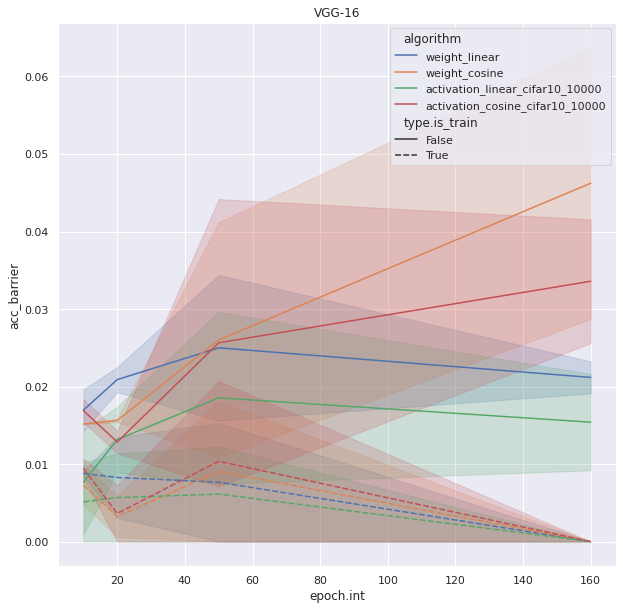

64


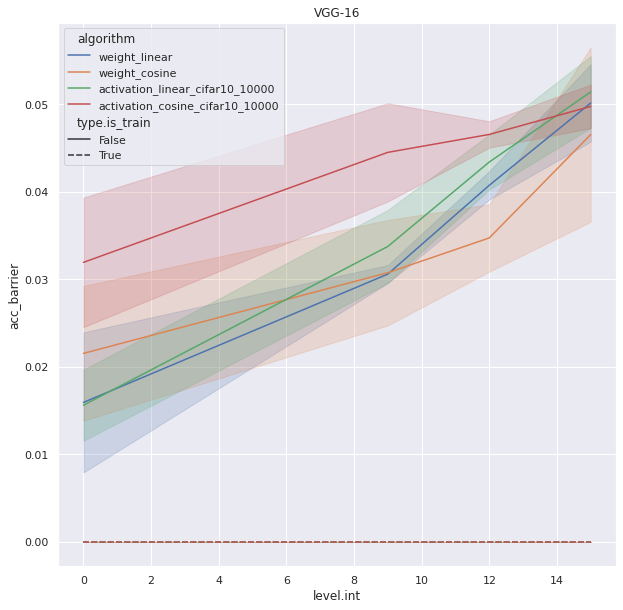

64


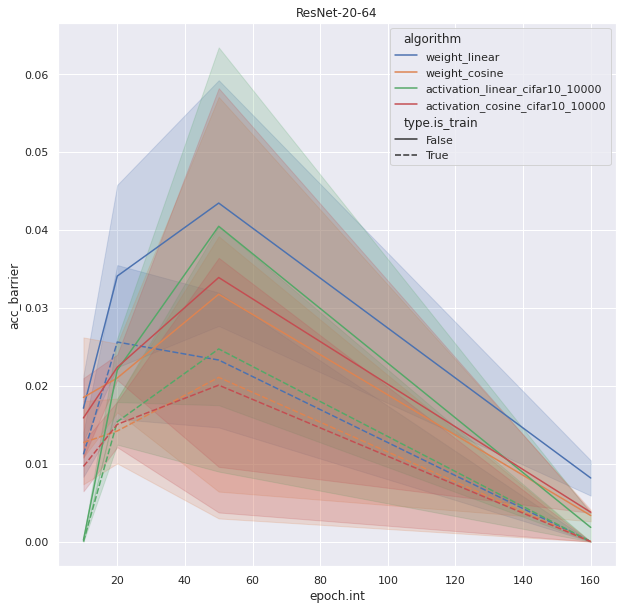

64


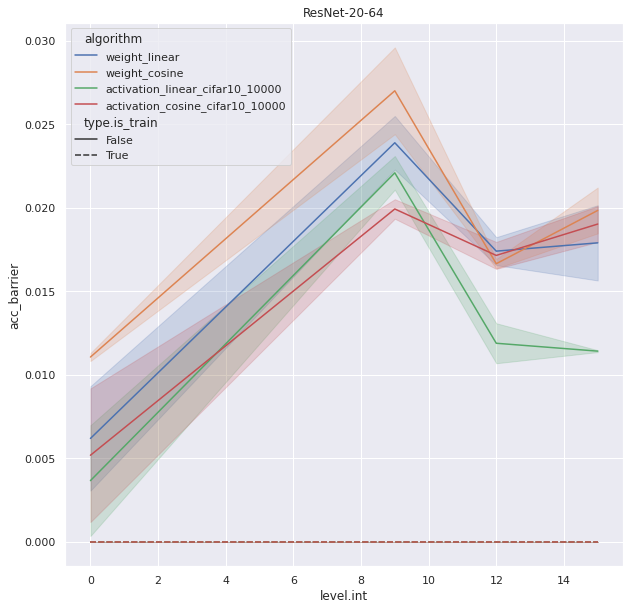

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})

for model in df["path.model_name"].unique():
    for is_pruned in [False, True]:
        subset = df[(df["path.model_name"] == model) & (df["path.is_pruned"] == is_pruned) & (df["algorithm"].apply(lambda x: "_all" not in x and "_first" not in x and "50000" not in x and "loglinear" not in x))]
        print(len(subset))
        ax = sns.lineplot(data=subset, x="level.int" if is_pruned else "epoch.int", y="acc_barrier", hue="algorithm", style="type.is_train")
        ax.set_title(model)
        plt.show()

96


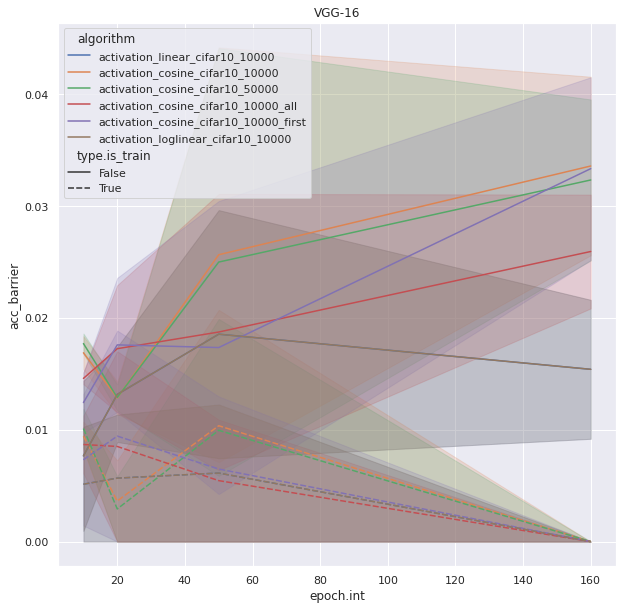

96


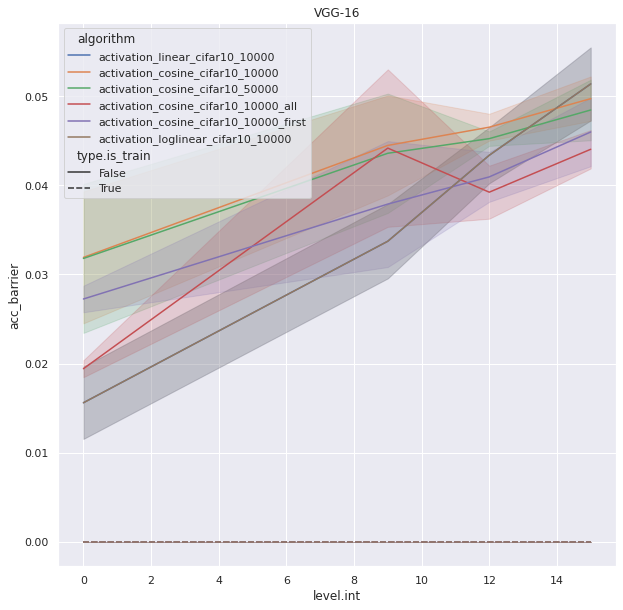

96


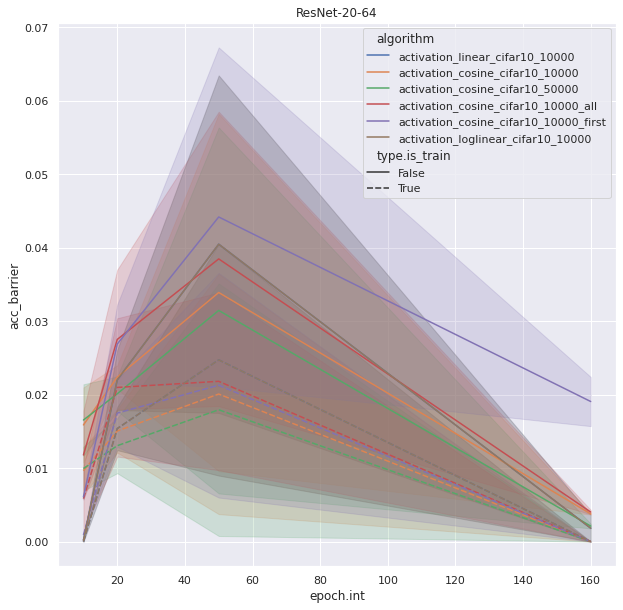

96


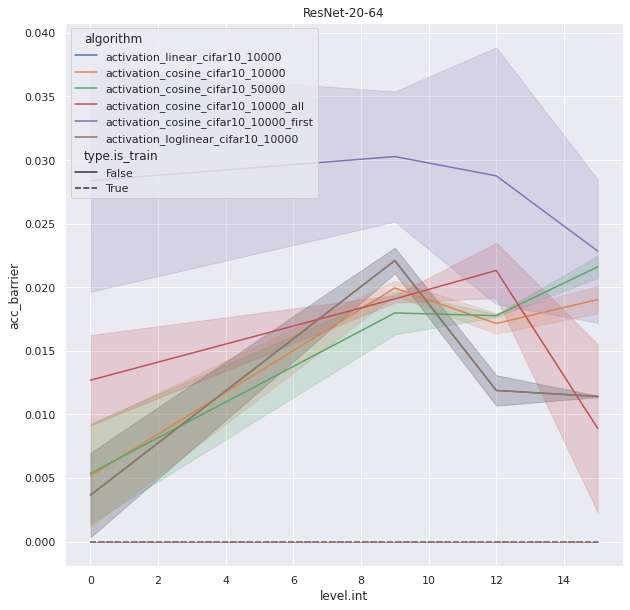

48


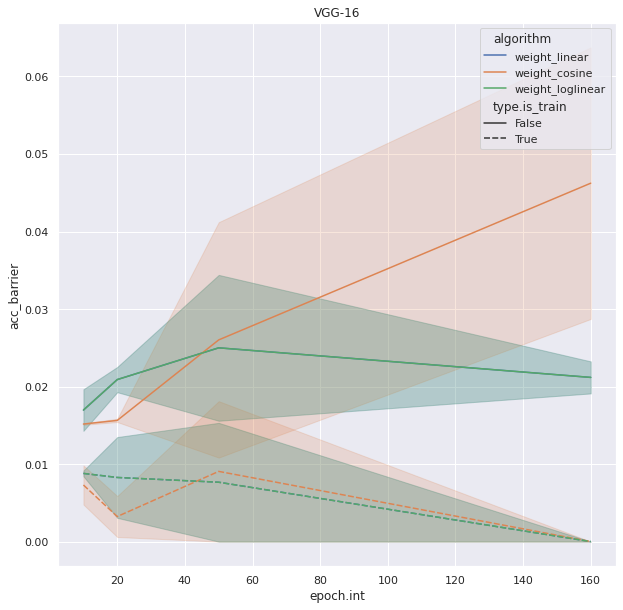

48


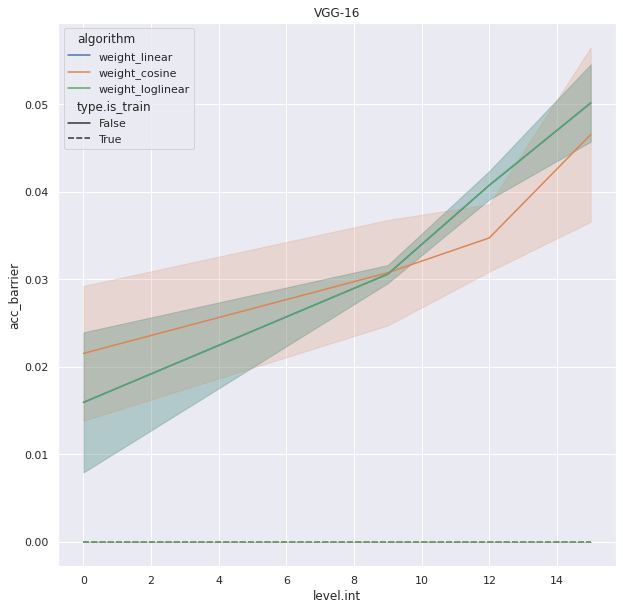

48


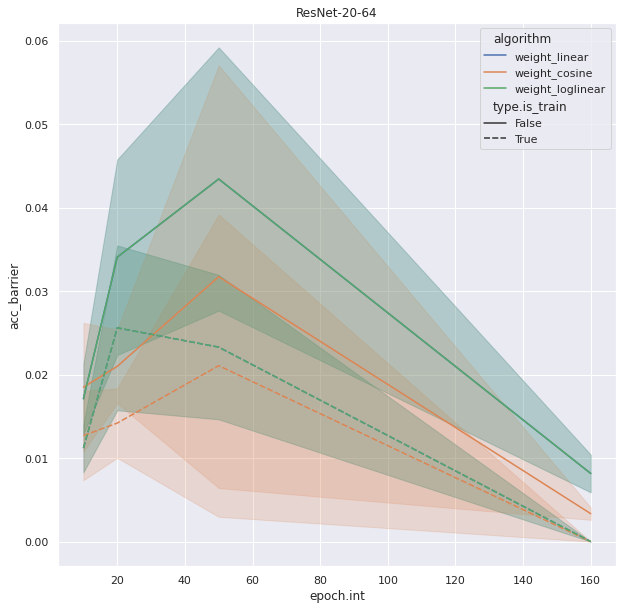

48


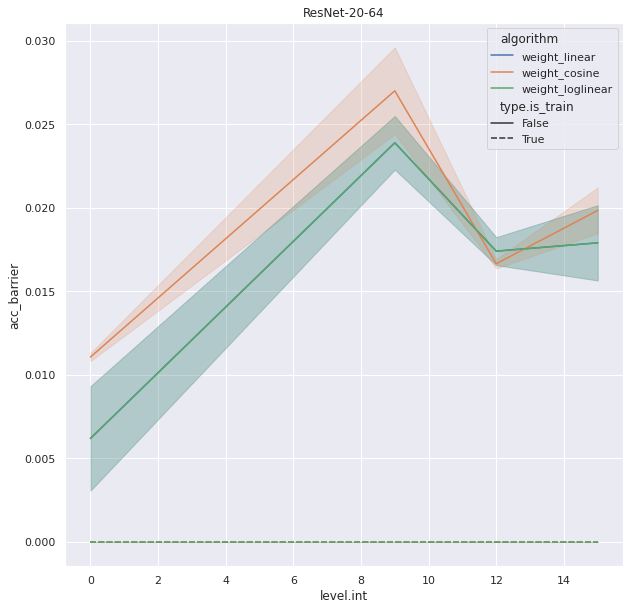

In [30]:
for type in [False, True]:
    for model in df["path.model_name"].unique():
        for is_pruned in [False, True]:
            subset = df[(df["path.model_name"] == model) & (df["path.is_pruned"] == is_pruned) & (df["algorithm.weight"] == type)]
            print(len(subset))
            ax = sns.lineplot(data=subset, x="level.int" if is_pruned else "epoch.int", y="acc_barrier", hue="algorithm", style="type.is_train")
            ax.set_title(model)
            plt.show()

32


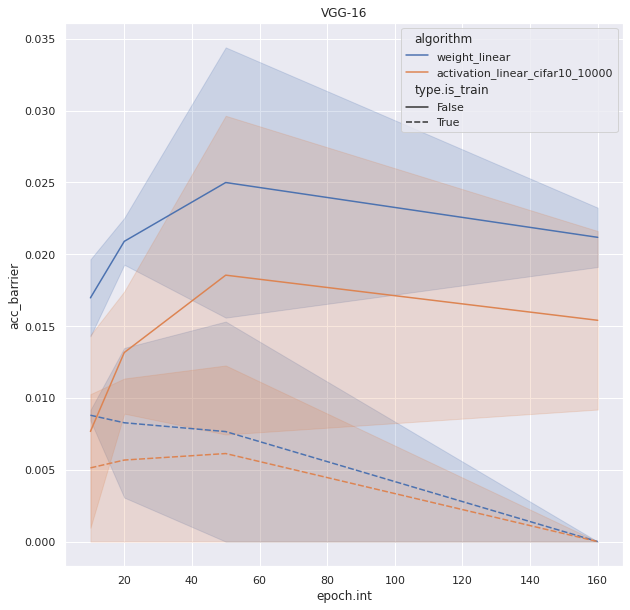

32


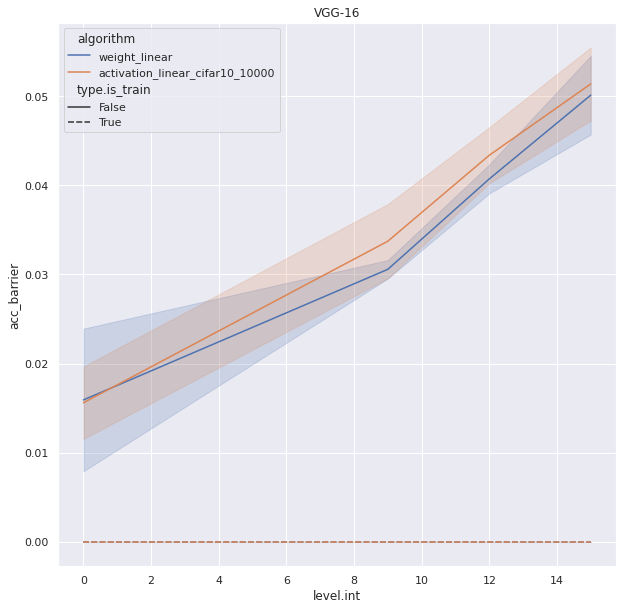

32


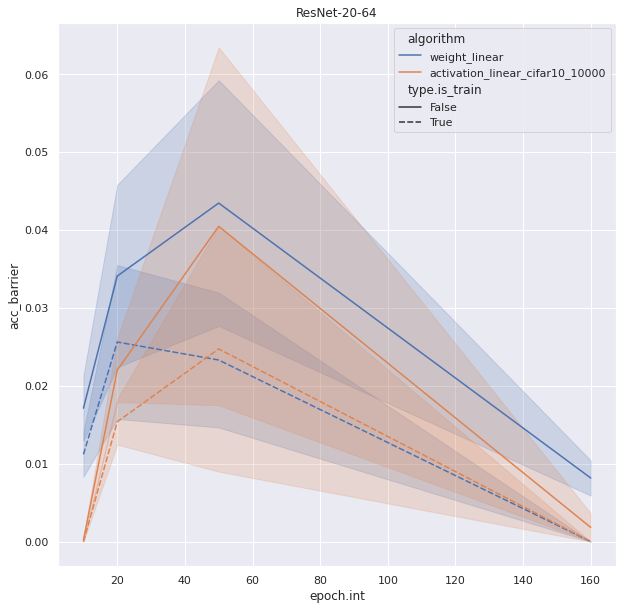

32


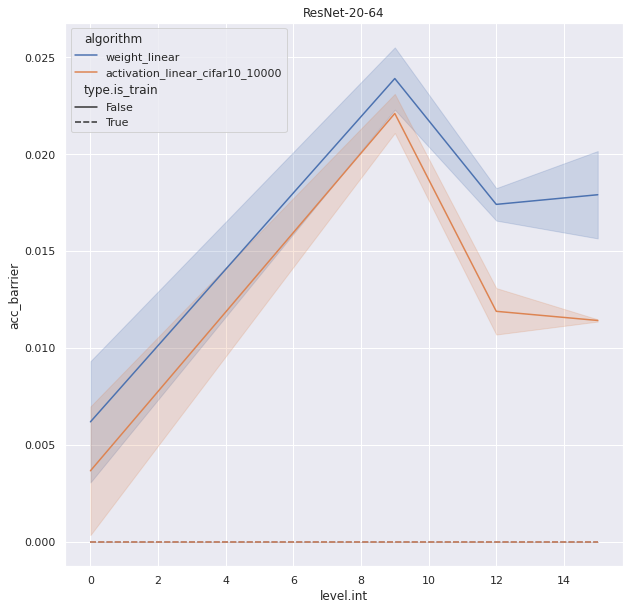

80


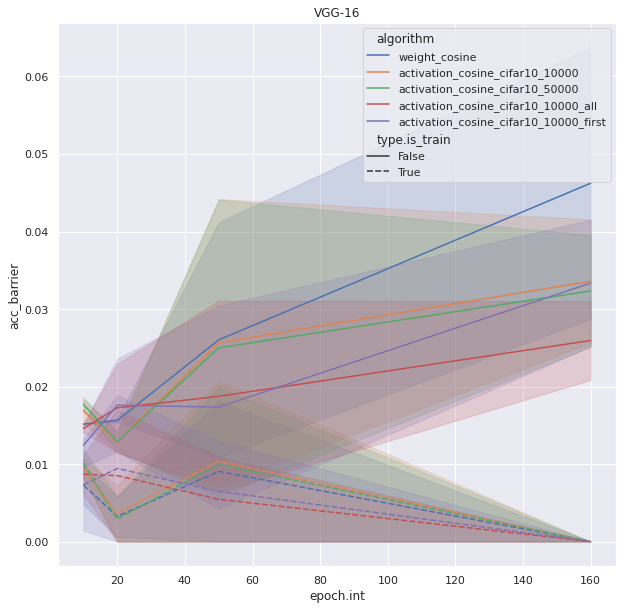

80


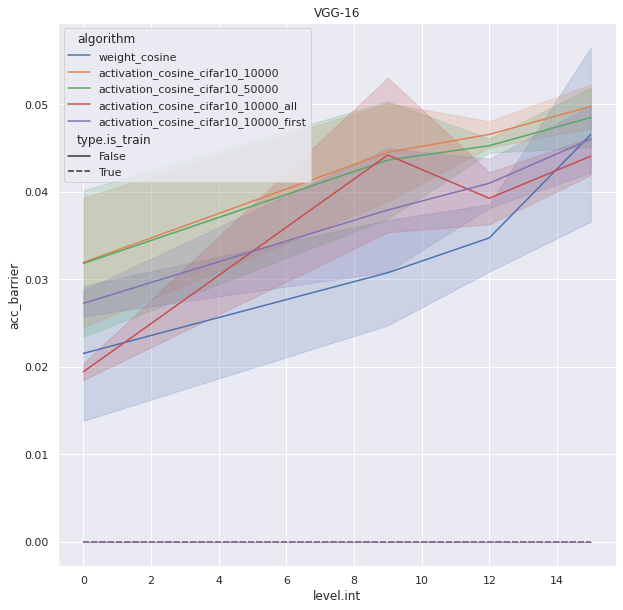

80


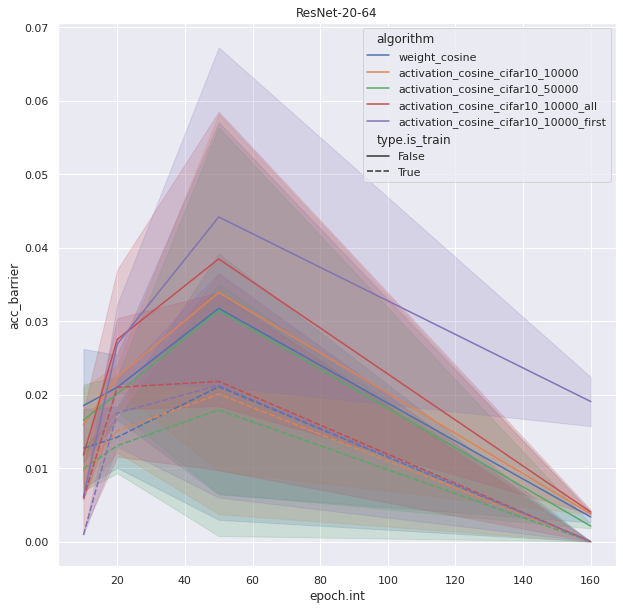

80


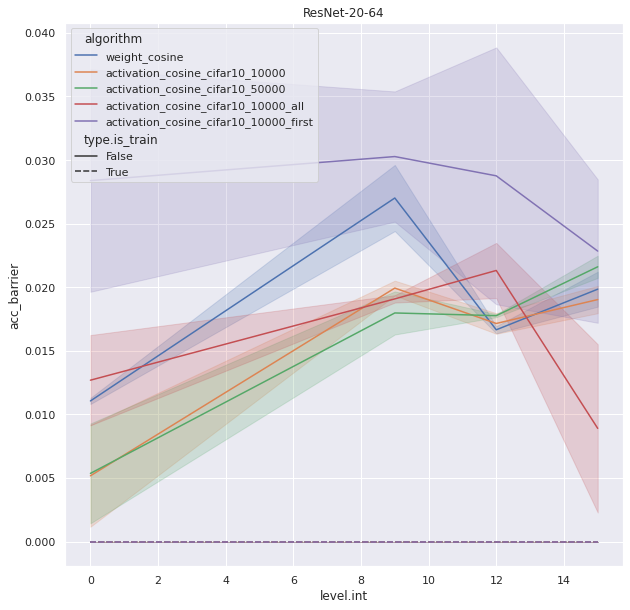

32


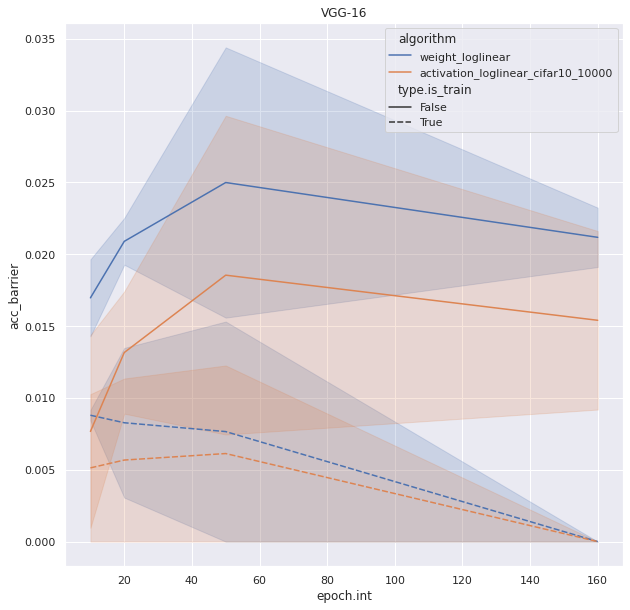

32


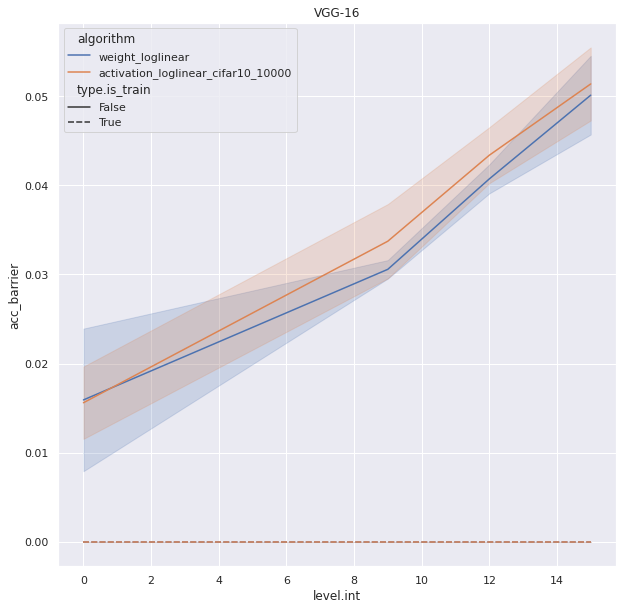

32


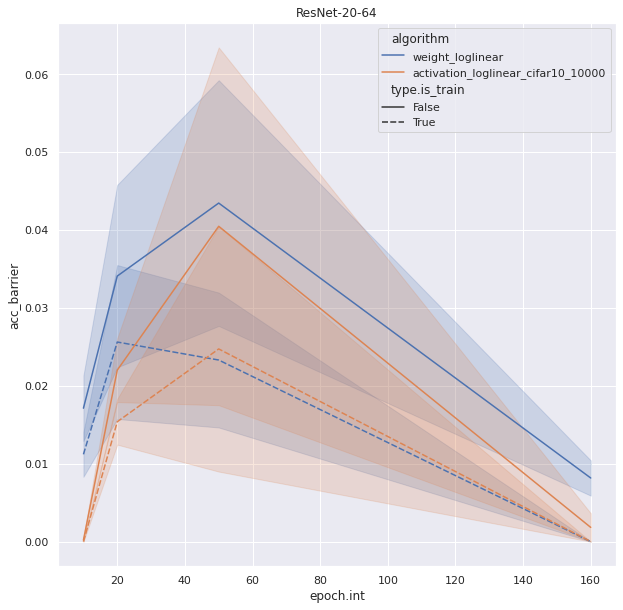

32


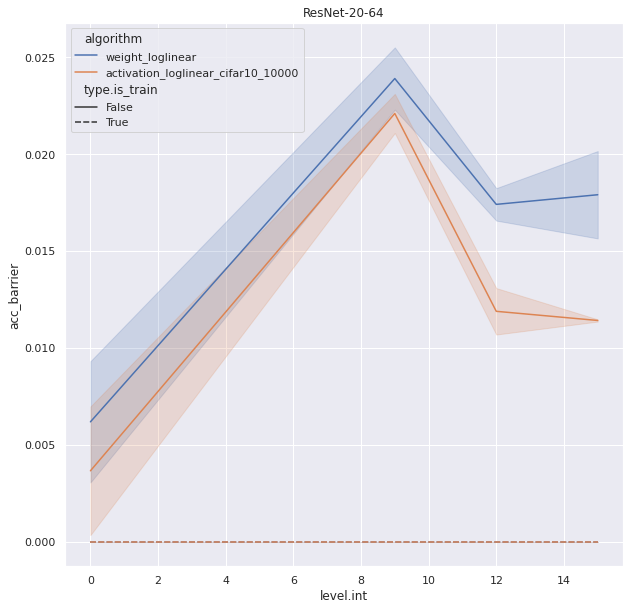

In [31]:
for type in ["linear", "cosine", "loglinear"]:
    for model in df["path.model_name"].unique():
        for is_pruned in [False, True]:
            subset = df[(df["path.model_name"] == model) & (df["path.is_pruned"] == is_pruned) & (df["algorithm.kernel"] == type)]
            print(len(subset))
            ax = sns.lineplot(data=subset, x="level.int" if is_pruned else "epoch.int", y="acc_barrier", hue="algorithm", style="type.is_train")
            ax.set_title(model)
            plt.show()